# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Требуется научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**

Определить рыночную стоимость объектов недвижимости.

**Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

**Содержание**

1. [Изучение общей информации](#1)

2. [Переработка данных](#2)

   1. [Работа с пропусками, аномалиями и поиск неявных дублей в столбцах](#21)
 
   2. [Изменение типов данных столбцов](#22)
 
   3. [Выводы](#23)
 
3. [Добавить новые столбцы](#3)

   1. [Цена одного квадратного метра](#31)
 
   2. [День недели, месяц и год публикации объявления](#32)
 
   3. [Тип этажа квартиры](#33)
 
   4. [Расстояние до центра города в километрах](#34)
 
   5. [Выводы](#35)
 
4. [Исследование данных](#4)

   1. [Изучение параметров](#41)
 
   2. [Изучение времени продажи квартиры](#42)
 
   3. [Поиск факторов влияющих на стоимость объекта](#43)
 
   4. [Исследование цен в 10 населённых пунктах с наибольшим числом объявлений](#44)
 
   5. [Исследование цен на квартиры в Санкт-Петербурге в зависимости от расстояния до центра города](#45)
 
   6. [Выводы](#46)
 
5. [Общий вывод](#46)

### Открыть файл с данными и изучите общую информацию  <a id='1'></a>

Для начала подключим нужные библиотеки для дальнейшего исследования данных и сохраним данные в переменной `df`.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

C:\Users\ksyub\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
# сохраним в переменную df данные и скорректируем их отображение
df =pd.read_csv('datasets/real_estate_data.csv', sep='\t')

# отображаем все столбцы
pd.set_option('display.max_columns', None)

Выведем общую информацию о датафрейме.

In [8]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Столбец `cityCenters_nearest` нарушет стиль, исправим.

In [4]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

Посмотрим описательную статистику методом `df.describe()` и построим гистограмму.

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


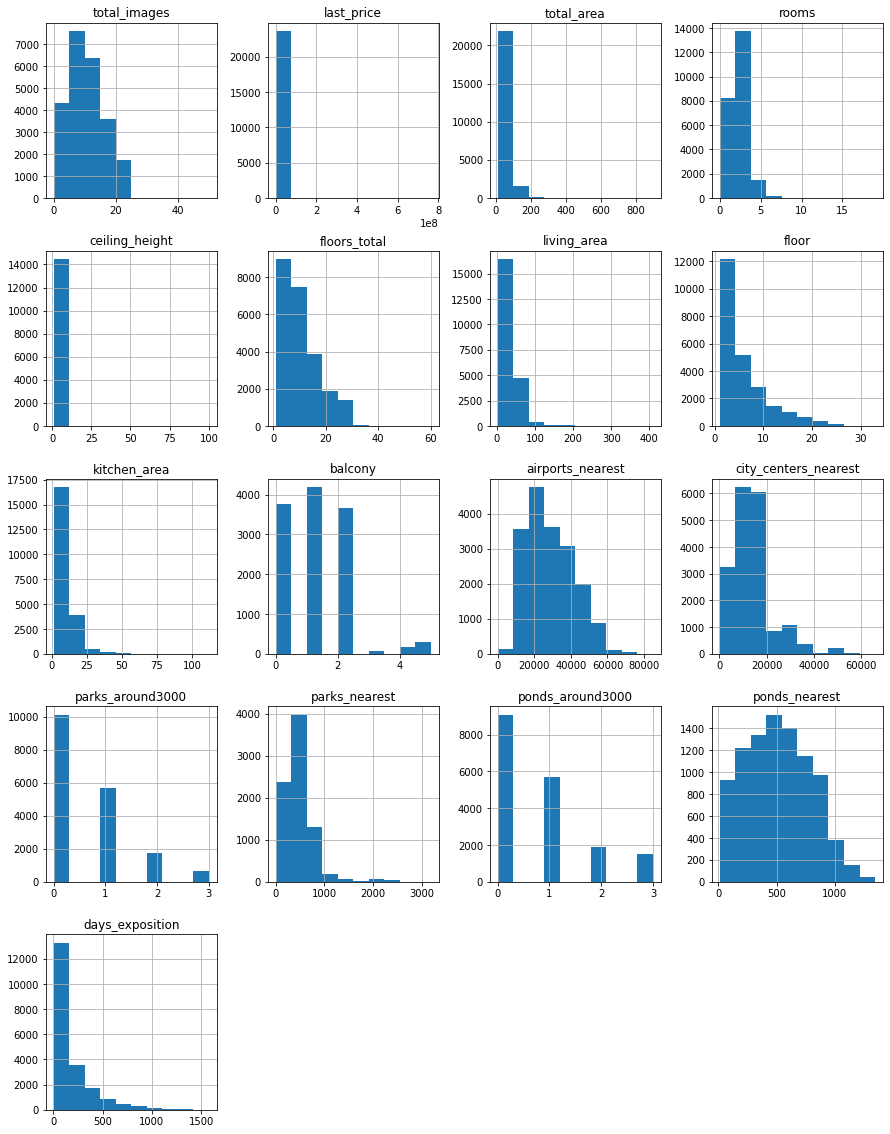

In [5]:
display(df.describe())
df.hist(figsize=(15, 20));

Проверим наличие дубликатов.

In [6]:
df.duplicated().sum()

0

#### Вывод

Итак, присланные данные были склеины в одну строку, это произошло из-за разделителей `\`. Столбец `cityCenters_nearest` нарушал общий стиль датасета. Всего 23699 записей, при этом имеются столбцы с пропусками и некоторыми неточностями, например с столбце `ceiling_height` высота потолка варируется от 1 до 100 м.

В большинстве столбцов нужно исправить тип данных для дальнейшего исследования. Также отустсвуют дубликаты.

Перейдем к этапу передобработки данных.

### Предобработка данных <a id='2'></a>

#### Работа с пропусками, аномалиями и поиск неявных дублей в столбцах <a id='21'></a>

Определим в каких стоблцах есть пропуски и по возможности постараемся их заполнить.

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В следующих стоблцах присутствуют пропуски:

- `ceiling_height` - 9195 пропусков. Скорее всего некооторые продавцы не указывали высоту потолка. Можно заменить медианой, т.к. эти данные не понадобяться для дальнейшего исследования.
- `floors_total` - 86 пропусов. Возможно была неправильно сформирована выгрузка датасета. Пустым значениям присвоим этажность квартиры, т.к. в дальнейшем исследование эти данные не понадобятся.
- `living_area` - 1903 пропуска. Оставим пустые строки, т.к. данное значение влияет на стоимость продажи квартиры.
- `is_apartment` - 20924 пропуска. Оставим как есть, т.к. в дальнейшем исследование эти данные не понадобятся.
- `kitchen_area` - 2278 пропусков. Оставим пустые строки, т.к. данное значение влияет на стоимость продажи квартиры.
- `balcony` - 11519 пропусков. Заменим `NaN` на `0`.
- `locality_name` всего 49  пропусков. Заменим `NaN` на `Другие`.
- `airports_nearest` - всего 5542 пропуска, `city_centers_nearest` имеет 5519 пропусков, `parks_around3000` имеет 5518 пропусков, `parks_nearest` - всего 15620 пропусков, `ponds_around3000` - 5518 пропусков, `ponds_nearest` - 14589 пропусков, `days_exposition` имеет 3181 пропуск. Скорее всего такие данные не получиться восстановить на основе имеющейся информации.

По порядку рассмотрим и заполним имеющиеся у нас столбцы.

**Рассмотрим столбец `ceiling_height`**

В данном столбце присутсвуют пропуски, а также нереалистичные данные.

Для начала посмотрим количество пропусков.

In [8]:
df['ceiling_height'].isna().sum()

9195

Получилось 9195 записей, почти половина пропущенных. 

Данные вводили пользователи и, скорее всего, при составлении объявления на продажу input был необязательным для публикации на площадке, из-за этого такое количество пропусков. Чтобы пользователи оставляли данные о высоте потолка можно, например, завлечь пробным продвижением объявления на несколько дней.

Далее выведем описательную статистику для данного столбца.

In [9]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Как было описано ранее, минимальная высота потолка составляет 1 м, а максимальная 100 м, что является аномалией, при этом медианное значение составляет 2.65 м. Заполним пропуски медианой.

In [10]:
ceiling_height_median = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median)

В соответствии с положениями в  <a href="https://docs.cntd.ru/document/1200079628">СНиПе</a> минимальная высота потолка должна составлять 2.1 м. Что касается максимальной высоты, то нет четкого регламента, который устанавливает данное значение. <a href="https://pod-potol.com/remont-i-ukhod/oformlenie/kakaya-standartnaya-vysota-potolkov-v-kvartire-normy-i-standarty-dlya-raznykh-vidov-zdaniy.html">В данной статье </a> обозначено, что в современных квартирах высота потолка не превышает 3.2 м, для старых построек высота потолка может превысить 4 м. Для данного исследования будем считать, что минимальная высота будет составлять 2.1 м, а максимальная 4 м.

Найдем, сколько значений требуется изменить.

In [11]:
df.query('ceiling_height<=2.1 or ceiling_height>=4')['ceiling_height'].count()

128

Получилось всего 128 записей, что не так много. Заменим их на медиану.

In [12]:
df.loc[(df['ceiling_height']<=2.1) | (df['ceiling_height']>4),'ceiling_height'] = ceiling_height_median

Посмотрим, какие по итогу получились значения.

count    23699.000000
mean         2.693522
std          0.203806
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

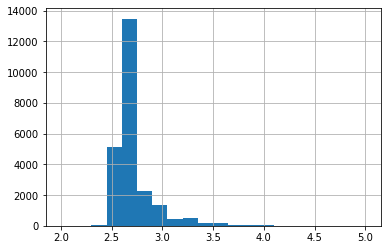

In [13]:
display(df['ceiling_height'].describe())
df['ceiling_height'].hist(bins=20 , range=(2, 5));

Видим, что теперь высота потолков не выходит за указанный диапозон. Средняя высота потолка сотсавляет 2.7.

**Рассмотрим столбец `floors_total`**

В данном столбце есть пропуски, посмотрим, сколько их.

In [14]:
df['floors_total'].isna().sum()

86

Количество пустых строк составляет 86, что не так много. Предположу, что произошел сбой при выгрузке данных. Пропуски можно заменить объявлениями в тех же домах, если объявление было опубликовано единожды, то можно обраться к владельцу объявления.

Присвоим пустыми `floors_total` значениями из столбца `floor`.

In [15]:
df['floors_total'] = df['floors_total'].where(~df['floors_total'].isna(), df['floor'])

Посмотрим, какие по итогу получились значения.

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

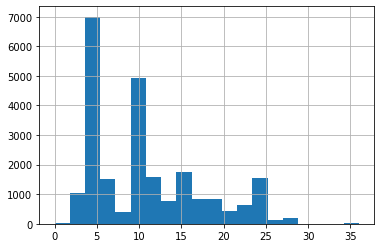

In [16]:
display(df['floors_total'].describe())
df['floors_total'].hist(bins=20 , range=(0, 36));

Видим, что отсутсвуют пустые значения.

**Расмотрим столбец `balcony`**

В столбце есть пропуски, еще раз посмотрим сколько их.

In [17]:
df['balcony'].isna().sum()

11519

Получилось 11519 записей, почти половина пропущенных. 

Данные вводили пользователи и, скорее всего, при составлении объявления на продажу input был необязательным для публикации на площадке, из-за этого такое количество пропусков. Чтобы пользователи количестве балконов можно, например, завлечь пробным продвижением объявления на несколько дней.

Заполним данные значения 0.

In [18]:
df['balcony'] = df['balcony'].fillna(0)

Посмотрим, какие по итогу получились значения.

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

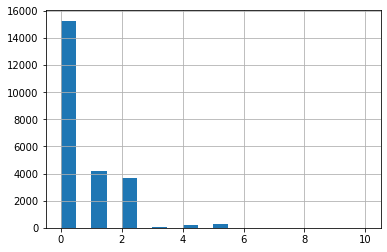

In [19]:
display(df['balcony'].describe())
df['balcony'].hist(bins=20 , range=(0, 10));

Пустые значения заполнены. У больнишства квартир отсутсвуют балконы.

**Рассмотрим столбец `locality_name`**

Еще раз посмотрим сколько пустых строк.

In [20]:
df['locality_name'].isna().sum()

49

Количество пустых строк составляет 49, что не так много. Предположу, что произошел сбой при выгрузке данных. Пропуски можно заменить объявлениями в тех же домах, если объявление было опубликовано единожды, то можно обраться к владельцу объявления.

Заменим пустые значения `Другие`.

In [21]:
df['locality_name'].fillna('Другие', inplace=True)

Посмотрим, какие по итогу получились значения.

In [22]:
(df.pivot_table(index='locality_name', 
                values='last_price', 
                aggfunc='count')
   .sort_values(by='locality_name'))

,last_price
locality_name,
Бокситогорск,16
Волосово,36
Волхов,111
Всеволожск,398
Выборг,237
...,...
село Путилово,2
село Рождествено,3
село Русско-Высоцкое,9


Заметим, что в данных присутсвуют неявные дубликаты. В некоторых названия в словах нужно заменить буку `ё` на `е`, также сократиить названия для поселков.

In [23]:
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 
              'поселок городского типа', 
              'поселок при железнодорожной станции', 
              'поселок станции', 
              'коттеджный поселок'], 'поселок', regex=True)
)    
(df.pivot_table(index='locality_name', 
                values='last_price', 
                aggfunc='count')
   .sort_values(by='locality_name'))

,last_price
locality_name,
Бокситогорск,16
Волосово,36
Волхов,111
Всеволожск,398
Выборг,237
...,...
село Путилово,2
село Рождествено,3
село Русско-Высоцкое,9


Итак, для стоблца `locality_name` убрали пропуски и неявные дубли.

#### Изменение типов данных

Рассмотрим типы данных датасета.

In [24]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Требуется перевести тип значений для следующих столбцов:

- в целочисленные `int`: `last_price` (стоимость указанна без учета копеек), `floors_total` (этаж не может быть дробным числом), `balcony` (число балконов не может быть дробным числом), `parks_around3000` и  `ponds_around3000` (последние 2 указывают на количекство парков и водоемов в радиусе 3 км).
- во временной формат: `first_day_exposition`.
- в строковый `str`: `locality_name`.

**Переведем столбцы в `int` и `string`** <a id='22'></a>

В столбцах `parks_around3000` и `ponds_around3000` присутствует `NaN`, то переведем их в тип `Int64`. Он повзоляет перевести значения в целочисленные при наличии пустых строк.

In [25]:
df = df.astype({'last_price': 'int', 
                'floors_total': 'int', 
                'balcony': 'int', 
                'parks_around3000': 'Int64', 
                'ponds_around3000': 'Int64',
                'locality_name': 'string'})

**Изменим тип значения для столбца `first_day_exposition`**


In [26]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M')

Отобразим конечный результат по переработке данных.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Выводы <a id='23'></a>

В полученном датасете была проведена предобработка данных: работа с пропусками, аномалиями, поиск неявных дублей и изменение типов данных.

- Работа с пропусками производилась в стобцах: `ceiling_height`, `balcony`, `floors_total` и `locality_name`.

Для столбцов `ceiling_height` и `balcony` причниной пропусков являлся человеческий фактор. Скорее всего продавцы не заполняли данные значения. Чтобы в дальнейшем минимизировать количество пропусков можно, например, предложить продавцам пробное продвижение объявления. Для стоблца `balcony` пустые значения были заполнены `0`, т.к. возможно в квартирах они отсутствуют. `ceiling_height` был заполнен медианным значением.

Что касается столбцов `floors_total` и `locality_name` - причиной пропусков послужил технический фактор. Скорее всего при выгрузке даных были потеряны некторые значения в стобцах. Чтобы восстановить значения можно, например, создать отдельную базу данных по всем домам в которых храняться этажность строения, а также дополнить, для дальнейших исследований, количество подъездов,  наличие грузового лифта и т.д. и заполнять ими отсутсвующие значения. Аналогично можно также заполнить `locality_name`, имея готовую базу данных. В столбце `floors_total` вместо пропусков была указана этажность квартиры, т.к. пропусков всего 86. В столбце `locality_name` все значения NaN заменили на `Другие`.

Что касается столбцов, в которых присутсвуют пропуски:

`living_area` и `kitchen_area` значенния могли не внести как и пользватели, так и могла быть ошибки при формировании датасета. Эти столбцы не получиться заполнить средним значением или медианой, т.к. они влияют на конечную стоимостью квартиры. Чтобы заполнить пропуски можно обратиться к владельцам объявления.

Наличие пропусков в `is_apartment` обусловленно тем, что нет информации в датасете, по которой можно определить: является ли квартира апартаментом. Чтобы заполнить пропуски можно обратиться к владельцам объявления.

Столбцы `airports_nearest`, `city_centers_nearest`, `parks_around3000` и `ponds_around3000` имеют практически одинаковое количество пропусков. Скорее всего при формирование данных было заданно ограничение в м, следовательно некоторые объявления находились вне заданных значений. Для того, чтобы заполнить пустые значения требуется расширить радиус исследуемых значений.

`parks_nearest` и `ponds_nearest` также при формировании датасета было задано ограничение в м. Для того, чтобы заполнить пустые значения требуется расширить радиус исследуемых значений.

В столбце `days_exposition` пропуски обсловлены тем, что некоторые объявления не были снята с публикации на момент формирования датасета. 

- Работа с аномалиями в столбце `ceiling_height`

Первоначально в данном столбце минимальная и максимальная высота сотсавляла 1 м 100 м, что выглядело нералистично. Значения, которые ниже 2.1 м и выше 4 м были заполнены медианным значением. Чтобы избежать таких аномалий, можно указать допустимые границы высоты потолка.

- Поиск неявных дублей в столбцен `city_centers_nearest`

В столбце были перечесления населенных пунктов с дублями, например: `поселок` и `посёлок`. В ходе анализа значений столбца, все дублирующиеся значения были сведены к одному стандартоному названию.

- Изменение типов данных

Столбцы `last_price`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` изменили на целочисленные. Столбец `locality_name` изменили на строковый тип. `first_day_exposition` поменяли на `datetime64`.

### Добавим новые столбцы <a id='3'></a>

Добавим новые столбцы для исследания.

#### Цена одного квадратного метра <a id='31'></a>

Создадим столбец `price_m2` и сохраним цену для одного квадратного метра и округлим значения до 2 знаков после запятой.

In [28]:
df['price_m2'] =  (df['last_price'] / df['total_area']).round(2)

#### День недели, месяц и год публикации объявления <a id='32'></a>

Созададим столбцы `weekday`, `month`, `year` и заполним их данными из `first_day_exposition`.

In [29]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

#### Тип этажа квартиры <a id='33'></a>

Создадим функцию, которая на вход будет принимать значения из `floor` и возвращать одну из категорий:

- первый;
- последний;
- другой.

In [30]:
def floor_сat(row):
    flat_floor = row['floor']
    last_floor = row['floors_total']
    if flat_floor == 1:
        return 'Первый'
    elif flat_floor == last_floor:
        return 'Последний'
    return 'Другой'
df['floor_cat'] = df.apply(floor_сat, axis=1)
df['floor_cat'].head(5)

0    Другой
1    Первый
2    Другой
3    Другой
4    Другой
Name: floor_cat, dtype: object

#### Расстояние до центра города в километрах <a id='34'></a>

Добавим столбец `city_centers_nearest_km` и заполним его данными из `city_centers_nearest` в км.

In [31]:
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).round()
df = df.astype({'city_centers_nearest_km': 'Int64'})

Проверяем наличие новых столбцов. 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  int64         
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23699 non-null  int64         
 7   living_area              21796 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             2775 non-null   object        
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             21421 n

#### Выводы <a id='35'></a>

По заданию были добавлены следующие столбцы:

- `price_m2` - цена за 1 квадратный метр.
- `weekday`, `month`, `year`, - день, месяц и год публикации.
- `floor_cat` - тип этажа квартиры.
- `city_centers_nearest_km` - расстояние до центра в киломметрах.

### Проведите исследовательский анализ данных <a id='4'></a>

#### Изучение параметров <a id='41'></a>

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

Проверим параметры на наличие аномалий, также при наличии редких выбросов отбросим их.

**Изучим общую площадь квартиры и построим для нее гистограмму.**

Выведем описательную статистику и построим гистограмму.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

99 Процентиль: 197.2


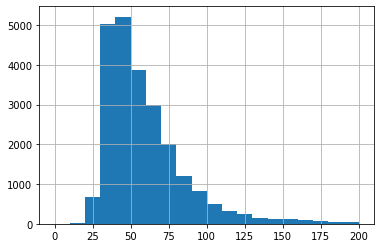

In [33]:
display(df['total_area'].describe())
print('99 Процентиль:', round(df['total_area'].quantile(0.99), 1))
df['total_area'].hist(bins=20, range = (0,200));

- Минимальная площадь квартиры 12 м2, вполне реалистично, возможно продают квартиру-студию.
- Максимальное значение 900 м2, много, но имеет место быть.
- Среднее сотсавляет 60, а медиана 52, есть небольшое смещение. Это означает, что выбросов существенно мало, что не помешает дальнейшему исследованию.
- В данной выборке будем считать значения, которые больше 200 м2 выбросами.

**Изучим жилую площадь квартиры и построим для нее гистограмму.**

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

99 Процентиль: 120.0


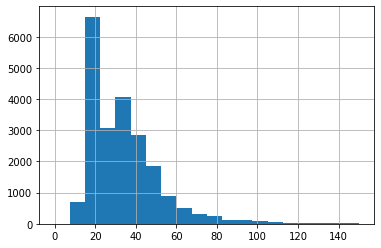

In [34]:
display(df['living_area'].describe())
print('99 Процентиль:', round(df['living_area'].quantile(0.99), 1))
df['living_area'].hist(bins=20, range = (0,150));

- Минимальная жилая площадь квартиры 2 м2, вполне реалистично, такая площадь возможна в квартирах-студиях.
- Максимальное значение 410 м2, много, но имеет место быть. 
- Среднее сотсавляет 35, а медиана 30, есть небольшое смещение. Это означает, что выбросов существенно мало, что не помешает дальнейшему исследованию.
- В данной выборке будем считать значения, которые больше 120 м2, выбросами.

**Изучим площадь кухни квартиры и построим для нее гистограмму.**

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

99 Процентиль: 35.1


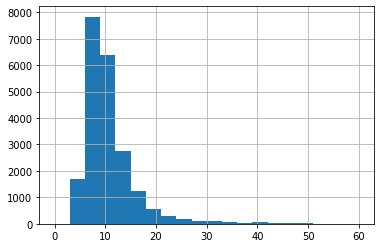

In [35]:
display(df['kitchen_area'].describe())
print('99 Процентиль:', round(df['kitchen_area'].quantile(0.99), 1))
(df['kitchen_area']).hist(bins=20, range = (0,60));

- Минимальная жилая площадь квартиры 1.3 м2, вполне реалистично, такая площадь возможна в квартирах-студиях.
- Максимальное значение 112 м2, много, но имеет место быть. 
- Среднее сотсавляет 11, а медиана 9, есть небольшое смещение. Это означает, что выбросов существенно мало, что не помешает дальнейшему исследованию.
- В данной выборке будем считать значения, которые больше 35 м2, выбросами.

**Изучим цены на квартиры и построим для нее гистограмму.**

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

99 Процентиль: 36000000.0


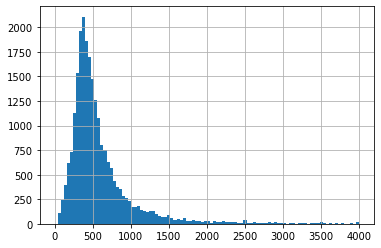

In [36]:
display(df['last_price'].describe())
print('99 Процентиль:', round(df['last_price'].quantile(0.99), 1))
(df['last_price'] / 10000).hist(bins=100, range = (0,4000));

- Минимальная стоимость квартиры 12190.
- Максимальное значение 760000000, высокая стоимость. 
- Среднее составляет 6500000, а медиана 4700000, есть небольшое смещение. Это означает, что выбросов существенно мало, что не помешает дальнейшему исследованию.
- В данной выборке будем считать значения, которые больше 36000000, выбросами.

**Изучим количество комнат в квартирах и построим гистограмму.**

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

99 Процентиль: 5.0


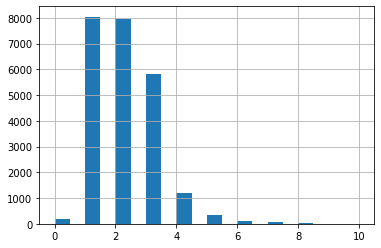

In [37]:
display(df['rooms'].describe())
print('99 Процентиль:', round(df['rooms'].quantile(0.99), 1))
(df['rooms']).hist(bins=20, range = (0,10));

- Минимальное количество комнат 0, скорее всего это квартиры-студии, либо квартиры со свободной планировкой. 
- Максимальное значение 19, вполне допустимо. 
- Среднее и медиана сотсавляют 2, смещение практически отсутствует. Это означает, что выбросов существенно мало, что не помешает дальнейшему исследованию.
- В данной выборке будем считать значения, которые больше 5, выбросами.

**Изучим высота потолков в квартирах и построим гистограмму**

Ранее мы определили, что в данном столбце были аномалии ввиде потолков 1 м и 100 м. Такие значения были заменены медианой.

count    23699.000000
mean         2.693522
std          0.203806
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

99 Процентиль: 3.5


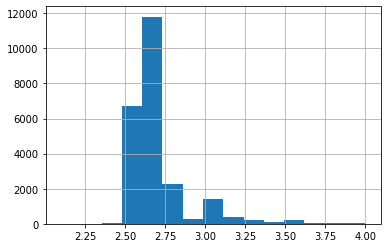

In [38]:
display(df['ceiling_height'].describe())
print('99 Процентиль:', round(df['ceiling_height'].quantile(0.99), 1))
(df['ceiling_height']).hist(bins=15, range = (2.1,4));

- Минимальнимальная высота потолка составляет 2.2 м.
- Максимальное значение 4 м. 
- Среднее и медиана сотсавляют 3, смещение практически отсутствует. Это означает, что выбросов существенно мало, что не помешает дальнейшему исследованию.
- В данной выборке будем считать значения, которые больше 3.5 м, выбросами.

**Изучим тип этажа квартиры и построим гистограмму**

Другой       17363
Последний     3419
Первый        2917
Name: floor_cat, dtype: int64

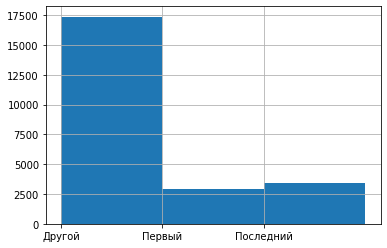

In [39]:
display(df['floor_cat'].value_counts())
(df['floor_cat']).hist(bins=3, range = (0, 3));

В основном квартиры продают не на первом и последнем этаже.

**Изучим общее количество этажей в доме и построим гистограмму.**

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

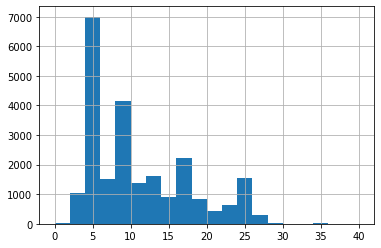

In [40]:
display(df['floors_total'].describe())
(df['floors_total']).hist(bins=20, range = (0, 40));

- Минимальный этажность дома составляет 1.
- Максимальное значение 60. 
- Среднее составляет 11, а медиана 9, есть небольшое смещение. Это означает, что выбросов существенно мало, что не помешает дальнейшему исследованию.

**Изучим расстояние до центра города в метрах и построим гистограмму**

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

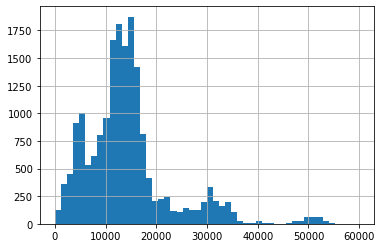

In [41]:
display(df['city_centers_nearest'].describe())
(df['city_centers_nearest']).hist(bins=50, range = (0, 60000));

- Минимальный расстояние составляет 181 м.
- Максимальное значение 65968 м. 
- Среднее составляет 14191, а медиана 13099, есть небольшое смещение. Это означает, что выбросов существенно мало, что не помешает дальнейшему исследованию.

**Изучим расстояние до ближайшего парка и построим гистограмму.**

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

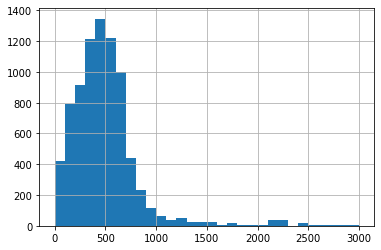

In [42]:
display(df['parks_nearest'].describe())
(df['parks_nearest']).hist(bins=30, range = (0, 3000));

- Минимальный расстояние составляет 1 м.
- Максимальное значение 3190 м. 
- Среднее составляет 490, а медиана 455, есть небольшое смещение. Это означает, что выбросов существенно мало, что не помешает дальнейшему исследованию.

In [44]:
def bound(coloumn):
    upper_bound = df[coloumn].quantile(q=0.99).round(2)
    df_slice = df[df[coloumn] > upper_bound]
    upper_bound_count = len(df_slice)
        
    print('Верхняя граница ' + str(coloumn) + ' ' + str(upper_bound))
    print('Количество строк под срез: ' + str(upper_bound_count))
    display(df_slice)
    

raw = ['total_area','last_price', 'rooms']
for r in raw:
    bound(r)


Верхняя граница total_area 197.21
Количество строк под срез: 237


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_cat,city_centers_nearest_km
155,8,96000000,317.0,2017-07-07,4,3.50,3,183.0,3,NaN,False,False,NaN,1,Санкт-Петербург,22673.0,1771.0,2,508.0,3,366.0,62.0,302839.12,4,7,2017,Последний,2
464,15,66571000,280.3,2015-06-11,6,2.65,8,159.5,7,NaN,False,False,21.1,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0,237499.11,3,6,2015,Другой,7
492,18,95000000,216.0,2017-12-05,4,3.00,5,86.0,4,NaN,False,False,77.0,0,Санкт-Петербург,21740.0,436.0,2,138.0,3,620.0,14.0,439814.81,1,12,2017,Другой,0
509,5,90000000,225.0,2016-06-26,6,2.65,4,134.0,2,NaN,False,False,19.5,2,Санкт-Петербург,32864.0,5720.0,0,NaN,2,519.0,416.0,400000.00,6,6,2016,Другой,6
521,20,25717300,230.1,2015-01-21,3,2.65,3,130.0,1,NaN,False,False,26.1,1,Пушкин,16877.0,29030.0,2,676.0,3,278.0,1441.0,111765.75,2,1,2015,Первый,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000,297.5,2018-09-09,6,3.14,4,181.8,2,NaN,False,False,21.9,0,Санкт-Петербург,20630.0,1229.0,3,189.0,3,40.0,42.0,103361.34,6,9,2018,Другой,1
23281,20,24800000,231.2,2015-01-21,6,3.10,5,99.8,4,NaN,False,False,27.4,0,Санкт-Петербург,21480.0,2453.0,3,75.0,1,795.0,NaN,107266.44,2,1,2015,Другой,2
23327,19,34400000,215.0,2019-03-15,5,2.75,4,82.4,4,NaN,False,False,40.1,0,Санкт-Петербург,37268.0,15419.0,0,NaN,0,NaN,NaN,160000.00,4,3,2019,Последний,15
23400,17,30000000,213.0,2017-09-28,7,3.40,5,151.4,5,NaN,False,False,30.8,0,Санкт-Петербург,21146.0,1225.0,2,342.0,3,30.0,299.0,140845.07,3,9,2017,Последний,1


Верхняя граница last_price 36000000.0
Количество строк под срез: 236


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_cat,city_centers_nearest_km
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,Другой,7
51,7,45000000,161.0,2017-10-17,3,3.20,8,38.00,4,NaN,False,False,50.0,0,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,541.0,279503.11,1,10,2017,Другой,7
155,8,96000000,317.0,2017-07-07,4,3.50,3,183.00,3,NaN,False,False,NaN,1,Санкт-Петербург,22673.0,1771.0,2,508.0,3,366.0,62.0,302839.12,4,7,2017,Последний,2
262,14,37500000,158.0,2019-01-24,4,2.65,12,88.00,4,NaN,False,False,40.0,0,Санкт-Петербург,25799.0,4593.0,0,NaN,2,840.0,NaN,237341.77,3,1,2019,Другой,5
263,12,39900000,140.6,2016-11-19,2,3.50,8,39.80,7,NaN,False,False,49.2,4,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,NaN,283783.78,5,11,2016,Другой,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22804,4,81960000,205.0,2017-09-29,4,3.20,9,108.00,3,NaN,False,False,10.0,0,Санкт-Петербург,21946.0,2242.0,1,679.0,1,227.0,169.0,399804.88,4,9,2017,Другой,2
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.70,6,NaN,False,False,30.2,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN,1542604.80,1,3,2019,Последний,1
22907,9,65000000,228.0,2016-06-02,4,2.65,5,200.00,2,NaN,False,False,NaN,0,Санкт-Петербург,22783.0,1295.0,3,619.0,3,269.0,NaN,285087.72,3,6,2016,Другой,1
23395,4,40000000,188.0,2017-05-29,6,2.65,6,109.51,4,NaN,False,False,31.3,0,Санкт-Петербург,23390.0,2254.0,2,425.0,1,62.0,30.0,212765.96,0,5,2017,Другой,2


Верхняя граница rooms 5.0
Количество строк под срез: 195


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_cat,city_centers_nearest_km
52,20,11795000,136.0,2017-09-22,6,3.00,2,94.00,2,NaN,False,False,11.0,1,Санкт-Петербург,16510.0,6582.0,1,526.0,0,NaN,NaN,86727.94,4,9,2017,Последний,7
201,5,10880000,123.1,2015-11-12,6,3.20,5,89.00,2,NaN,False,False,11.0,0,Санкт-Петербург,26009.0,3369.0,2,516.0,0,NaN,992.0,88383.43,3,11,2015,Другой,3
464,15,66571000,280.3,2015-06-11,6,2.65,8,159.50,7,NaN,False,False,21.1,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0,237499.11,3,6,2015,Другой,7
509,5,90000000,225.0,2016-06-26,6,2.65,4,134.00,2,NaN,False,False,19.5,2,Санкт-Петербург,32864.0,5720.0,0,NaN,2,519.0,416.0,400000.00,6,6,2016,Другой,6
581,20,65000000,365.0,2019-03-18,7,2.90,7,NaN,7,NaN,False,False,NaN,0,Санкт-Петербург,19827.0,1690.0,3,378.0,3,58.0,NaN,178082.19,0,3,2019,Последний,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23281,20,24800000,231.2,2015-01-21,6,3.10,5,99.80,4,NaN,False,False,27.4,0,Санкт-Петербург,21480.0,2453.0,3,75.0,1,795.0,NaN,107266.44,2,1,2015,Другой,2
23395,4,40000000,188.0,2017-05-29,6,2.65,6,109.51,4,NaN,False,False,31.3,0,Санкт-Петербург,23390.0,2254.0,2,425.0,1,62.0,30.0,212765.96,0,5,2017,Другой,2
23400,17,30000000,213.0,2017-09-28,7,3.40,5,151.40,5,NaN,False,False,30.8,0,Санкт-Петербург,21146.0,1225.0,2,342.0,3,30.0,299.0,140845.07,3,9,2017,Последний,1
23448,3,14700000,180.0,2018-02-08,6,3.00,6,126.00,5,NaN,False,False,20.0,0,Санкт-Петербург,23955.0,5089.0,0,NaN,2,616.0,NaN,81666.67,3,2,2018,Другой,5


In [45]:
def slice_upper(data,coloumn):
    
    upper_bound = data[coloumn].quantile(q=0.99).round(2)
    data_df = data[data[coloumn] < upper_bound]
    return data_df

raw = ['total_area','last_price', 'rooms']
for r in raw:
   df = slice_upper(df, r)

#### Изучение времени продажи квартиры

count    19934.000000
mean       177.556637
std        216.130730
min          1.000000
25%         44.000000
50%         93.500000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

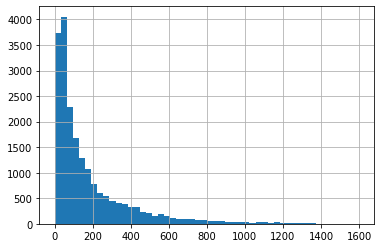

In [46]:
display(df['days_exposition'].describe())
(df['days_exposition']).hist(bins=50, range = (0, 1600));

- Самая быстрая продажа - 1 день, самая долгая -1580.

- В среднем квартиры продаются в течение 2-3 месяцев.

- Стоит также заметить, что среднее больше медианы практически в 2 раза, это значит, что выборосов много.

Рассмотрим эти выборсы. Посмотрим, насколько долго находяться и насколько быстро объявляения находяться на платформе.

In [47]:
lower_bound = df['days_exposition'].quantile(q=0.01)
upper_bound = df['days_exposition'].quantile(q=0.99)

display(lower_bound)
upper_bound

4.0

1055.0

In [48]:
display(len(df[df['days_exposition'] > upper_bound]))
len(df[(df['days_exposition'] < lower_bound)])

199

160

- Присутствуют объявления (160 публикации), которые были сняты за 4 дня, что является очень маленьким сроком.
- Есть объявления, которые были долго опубликованы (в течение 1055 дней). Всего таких объявления 199. 

#### Поиск факторов влияющих на стоимость объекта <a id='43'></a>

Исследуем зависимость цены от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Выше определили выборсы для первых 3 исследуемых значений. Отбросим их. Для исследований зависимостей количества комнат, этажности квартир и дату размещения от цены объявления добавим на график медиану.

**Зависимость цены от общей площади**

Зависимость цены от общей площади: 0.7759259968162799


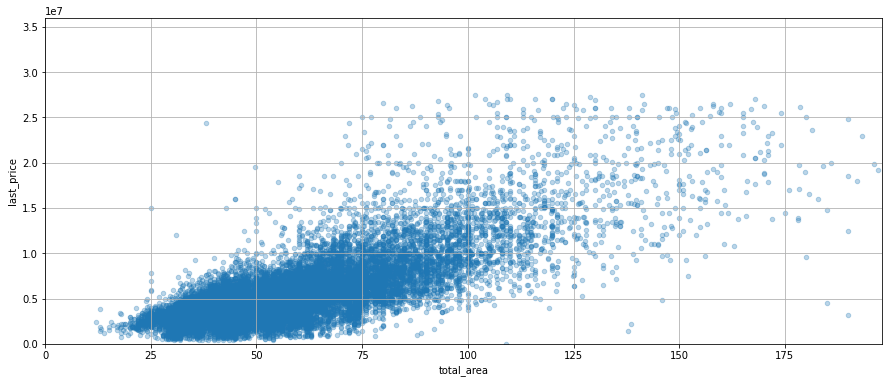

In [49]:
print('Зависимость цены от общей площади:', df['total_area'].corr(df['last_price']))

df.plot(x='total_area', 
        y='last_price', 
        kind='scatter', 
        alpha=0.3, 
        figsize=(15,6), 
        xlim=(0, 198), 
        ylim=(0, 36000000),
        grid = True);

- На графике видно: Стоимость объекта растет с увелечением общей площади.
- Коэффицент корреляции составляет 0.77. Он положительный, что подтверждает предыдущие утверждение.

**Зависимость цены от жилой площади**

Зависимость цены от жилой площади: 0.6468770525575203


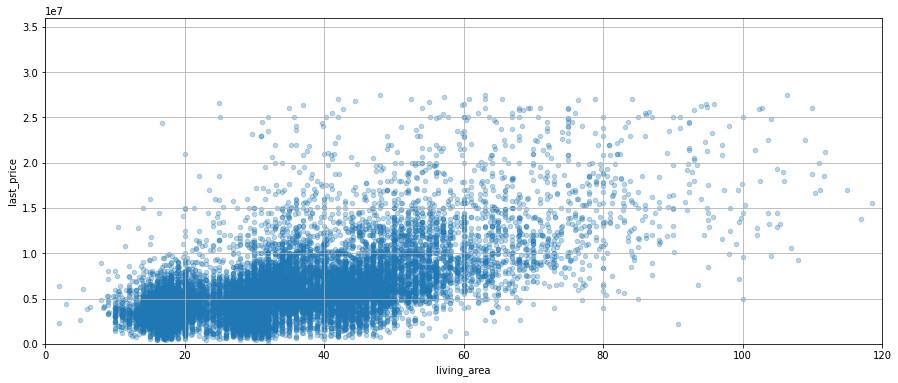

In [50]:
print('Зависимость цены от жилой площади:', df['living_area'].corr(df['last_price']))

df.plot(x='living_area', 
        y='last_price', 
        kind='scatter', 
        alpha=0.3, 
        figsize=(15,6), 
        xlim=(0, 120), 
        ylim=(0, 36000000),
        grid = True);

- На графике видно: Стоимость объекта растет с увелечением жилой площади.
- Коэффицент корреляции составляет 0.64. Он положительный, что подтверждает предыдущие утверждение.

**Зависимость цены от площади кухни**

Зависимость цены от площади кухни: 0.5984880379401036


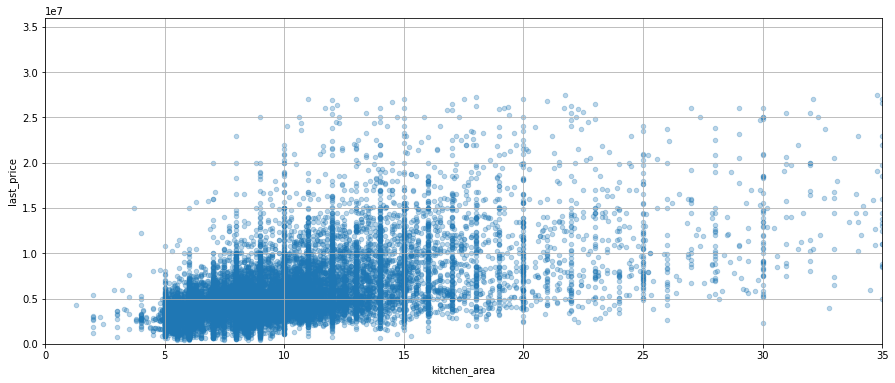

In [51]:
print('Зависимость цены от площади кухни:', df['kitchen_area'].corr(df['last_price']))

df.plot(x='kitchen_area', 
        y='last_price', 
        kind='scatter', 
        alpha=0.3, 
        figsize=(15,6), 
        xlim=(0, 35), 
        ylim=(0, 36000000),
        grid = True);

- На графике видно: Стоимость объекта растет с увелечением площади кухни.
- Коэффицент корреляции составляет 0.6. Он положительный, что подтверждает предыдущие утверждение.

**Зависимость цены от количества комнат**

Зависимость цены от количества комнат: 0.4585968076916384


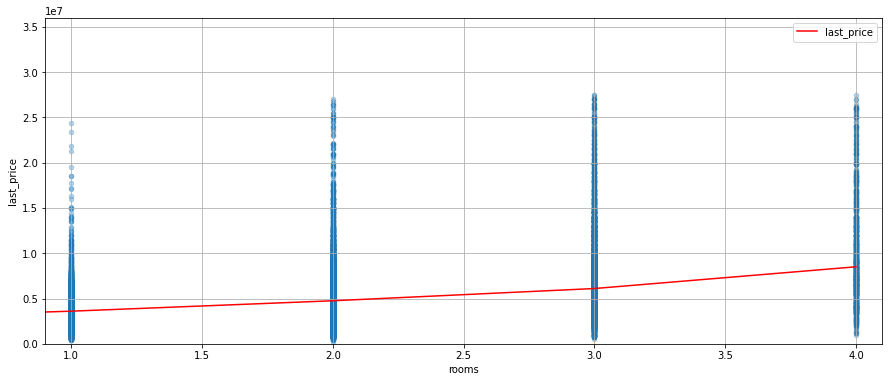

In [52]:
print('Зависимость цены от количества комнат:', df['rooms'].corr(df['last_price']))

_df = df.plot(x='rooms', 
              y='last_price', 
              kind='scatter', 
              alpha=0.3, 
              figsize=(15,6), 
              xlim=(0.9, 4.1), 
              ylim=(0, 36000000), 
              grid = True,
             )
(df.pivot_table(index = 'rooms', 
               values = 'last_price', 
               aggfunc = ['median'])
    .plot(ax=_df,
          y='median',
          grid = True,
          color='r'
    
    )
);

- На графике видно: Стоимость объекта растет с увелечением площади кухни.
- Коэффицент корреляции составляет 0.36. Он положительный, что подтверждает предыдущие утверждения, но при этом значение коэффицента низкий, что говорит нам о слабой зависимости между двумя параметрами.

**Зависимость цены от этажа, на котором расположена квартира**

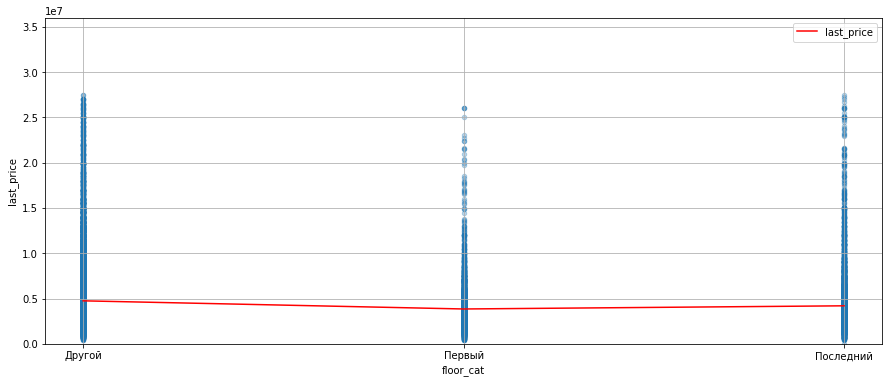

In [53]:
_df = df.plot(x='floor_cat', 
              y='last_price', 
              kind='scatter', 
              alpha=0.3, 
              figsize=(15,6), 
              xlim=(-0.1, 2.1), 
              ylim=(0, 36000000), 
              grid = True,
             )
(df.pivot_table(index = 'floor_cat', 
               values = 'last_price', 
               aggfunc = ['median'])
    .plot(ax=_df,
          y='median',
          grid = True,
          color='r'
    
    )
);

На графике видно: Стоимость объекта практически не зависит от этажности квартиры, стоимость квартир чуть ниже на первом этаже.

**Зависимость цены от дня недели размещения** <a id='42'></a>

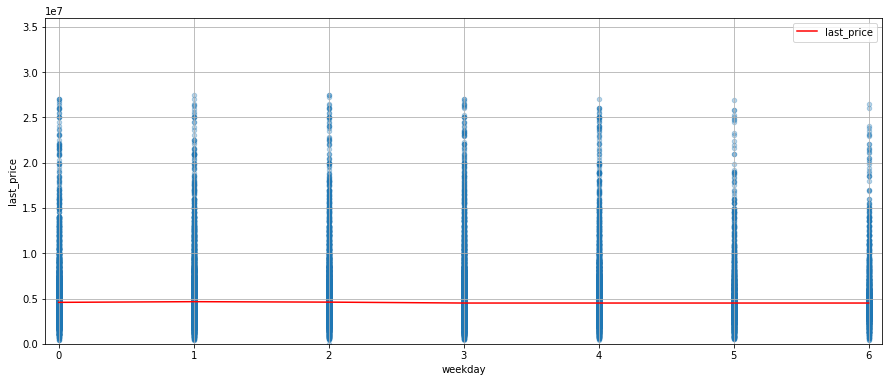

In [54]:
_df = df.plot(x='weekday', 
              y='last_price', 
              kind='scatter', 
              alpha=0.3, 
              figsize=(15,6), 
              xlim=(-0.1, 6.1), 
              ylim=(0, 36000000), 
              grid = True,
             )
(df.pivot_table(index = 'weekday', 
               values = 'last_price', 
               aggfunc = ['median'])
    .plot(ax=_df,
          y='median',
          grid = True,
          color='r'
    
    )
);

На графике видно: Стоимость объекта не зависит от дня недели размещения объявления о продаже.

**Зависимость цены от месяца размещения объявления**

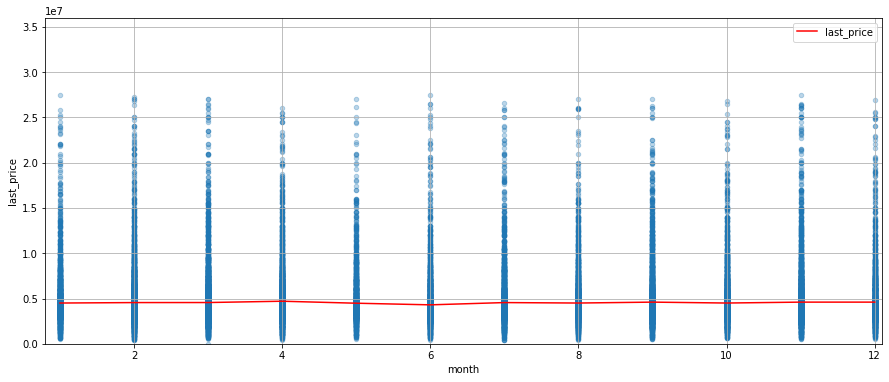

In [55]:
_df = df.plot(x='month', 
              y='last_price', 
              kind='scatter', 
              alpha=0.3, 
              figsize=(15,6), 
              xlim=(0.8, 12.1), 
              ylim=(0, 36000000), 
              grid = True,
             )
(df.pivot_table(index = 'month', 
               values = 'last_price', 
               aggfunc = ['median'])
    .plot(ax=_df,
          y='median',
          grid = True,
          color='r'
    
    )
);

На графике видно: Стоимость объекта не зависит от месяца размещения объявления о продаже.

**Зависимость цены от года размещения объявления**

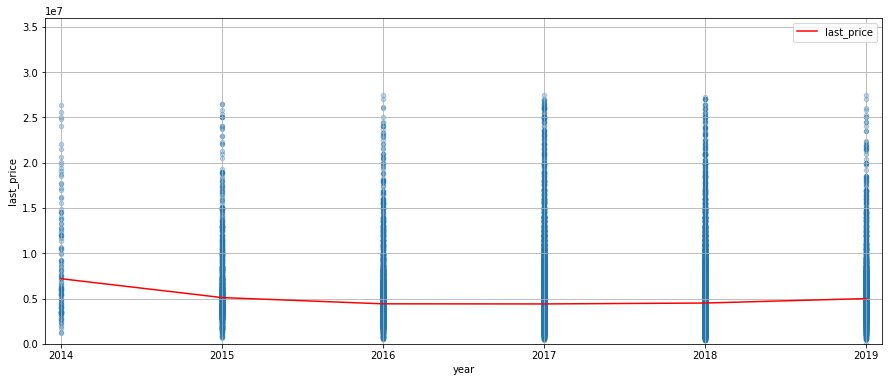

In [56]:
_df = df.plot(x='year', 
              y='last_price', 
              kind='scatter', 
              alpha=0.3, 
              figsize=(15,6), 
              xlim=(2013.9, 2019.1), 
              ylim=(0, 36000000), 
              grid = True,
             )
(df.pivot_table(index = 'year', 
               values = 'last_price', 
               aggfunc = ['median'])
    .plot(ax=_df,
          y='median',
          grid = True,
          color='r'
    
    )
);

На графике видно: Стоимость объектов упала с 2014 по 2015 года, а также с 2018 по 2019 года стоимость квартир немного увеличилась.

#### Исследование цен в 10 населённых пунктах с наибольшим числом объявлений <a id='44'></a>

Создадим таблицу с топ-10 населенных пунктов с наибольшим числом объявлений. Для каждой группы рассчитаем количество записей?среднюю и медианное значение стоимости квадратного метра.

In [57]:
locality_top_10 = (df
                   .pivot_table(index='locality_name',
                               values='price_m2', 
                               aggfunc=['count', 'mean', 'median'])
                   .droplevel(1,axis=1)
                   .sort_values(by='count', ascending=False)
                   .head(10)

)
locality_top_10

,count,mean,median
locality_name,,,
Санкт-Петербург,14988,110436.227030,104377.445
поселок Мурино,554,85763.043339,86059.295
поселок Шушары,438,78711.175457,76986.130
Всеволожск,398,68654.473970,65789.470
Пушкин,359,102624.704234,99987.180
Колпино,335,75420.730507,74725.270
поселок Парголово,326,90332.262638,91780.225
Гатчина,306,68797.701797,67860.570
деревня Кудрово,299,92473.547559,91860.470


- Населенный пункт с самой высокой стоимостью квартир: Санкт-Петербург.
- Населенный пункт с самой низкой стоимостью квартир: Выборг.

#### Исследование цен на квартиры в Санкт-Петербурге в зависимости от расстояния до центра города <a id='45'></a>

Посчитаем стоимость квартир за километр. После построим график зависимости цены от расстояния.

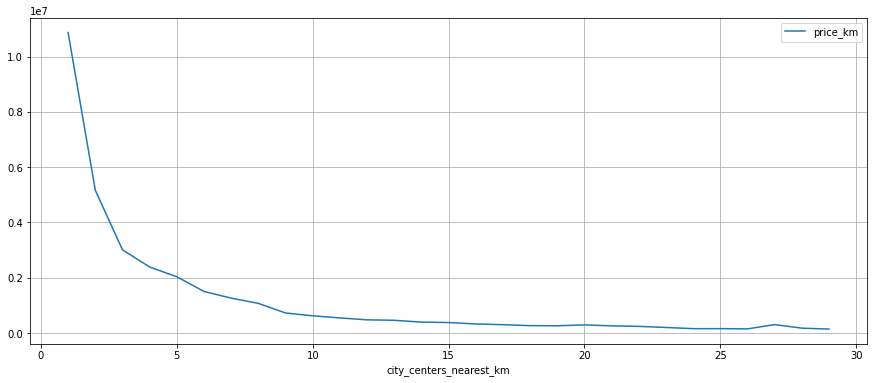

In [58]:
df['price_km'] = df['last_price']/df['city_centers_nearest_km']
df_spb = (df
          .query("locality_name == 'Санкт-Петербург'")
          .pivot_table(index='city_centers_nearest_km',
                       values='price_km',
                       aggfunc='mean')
          .plot(y='price_km',
                grid=True,
                figsize=(15,6))

)

На графике видно: Стоимость квартиры меняется в зависимости от расстояния, чем дальше от центра тем дешевле недвижимость. Также присутствует резкий спад в районе 5 км. 

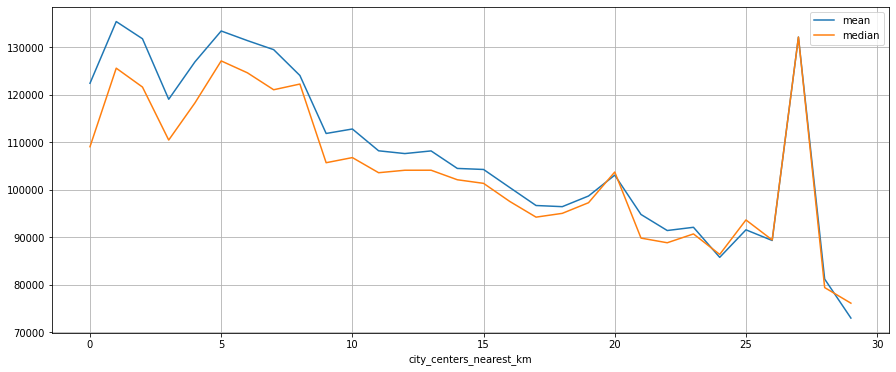

In [59]:
df_spb = (df
          .query("locality_name == 'Санкт-Петербург'")
          .pivot_table(index='city_centers_nearest_km',
                       values='price_m2',
                       aggfunc=['mean', 'median'])
          .droplevel(1,axis=1)
          .plot(y=['mean', 'median'],
                grid=True,
                figsize=(15,6))
);

#### Выводы <a id='46'></a>

- Были изучены следующие параметры: `total_area`, `living_area`, `kitchen_area`, `last_price`, `rooms`, `ceiling_height`, `floors_total`, `floors_total`, `city_centers_nearest`, `parks_nearest`. В некторых столбцах были убраны редкие и выбивающиеся значения. В большинстве квартир:
    * общая площадь составляет до 200 м2, жилая площадь до 120 м2, площадь кухни до 35 м2.
    * цена до 36 млн.
    * количество комнат до 5.
    * высота потолка до 3.5 м.
    * в основном продают квартиры не на первом и последнем этаже.
- В среднем квартиры продаются в течение 2-3 месяцев. Время продажи меньше 4 дней и больше 1055 дней можно считать необычными выбросами.
- Чем больше общая площадь, жилая площадь, площадь кухни, тем выше цена.
- Стоимость объектов недвижимости упала с 2014 по 2015 года, а также с 2018 по 2019 года стоимость квартир немного увеличилась.
- Самая высокая стоимость жилья в Санкт-Петербурге, а самая низкая в Выборге.
- Чем дальше от центра, тем ниже становиться стоимсоть квадратного метра квартир. Также присутствует пик в районе от 25 и 30 км, возможно там расположенм элитный район.

### Общий вывод <a id='5'></a>

В ходе исследования была проведена предобработка данных - устранены некоторые пропуски, некорректные значения, изменены названия населенных пунктов, устранение аномалий в стоблце высота потолка. Скорее всего, такие данные вводили пользватели, либо часть данных датасета была потеряна при выгрузке. 

Предварительно были добавлены столбцы для изучения данных: цена одного квадратного метра, день недели, месяц и год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.

Были сделаны сделаны следующие выводы:
- В большинстве квартир:
    - Общая площадь составляет до 200 м2, жилая площадь до 120 м2, площадь кухни до 35 м2.
    - Цена до 36 млн.
    - Количество комнат до 5.
    - Высота потолка до 3.5 м.
    - В основном продают квартиры не на первом и последнем этаже.
    - В среднем квартиры продаются в течение 2-3 месяцев. Время продажи меньше 4 дней и больше 1055 дней можно считать необычными выбросами.
- Чем больше общая площадь, жилая площадь, площадь кухни, тем выше цена.
- Стоимость объектов недвижимости упала с 2014 по 2015 года, а также с 2018 по 2019 года стоимость квартир немного увеличилась.
- Самая высокая стоимость жилья в Санкт-Петербурге, а самая низкая в Выборге.
- Чем дальше от центра, тем ниже становиться стоимсоть квадратного метра квартир. Также присутствует пик в районе от 25 и 30 км, возможно там расположен элитный район.